In [60]:
import networkx as nx
import matplotlib.pyplot as plt

In [61]:
m=4
n=2**m-1
Gm=[i for i in range(1,n)]

In [62]:
Gm

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [63]:
z=[(e,list(filter(lambda x: (x &e ==0) and (e > x) , Gm))) for e in Gm]

In [64]:
E=[]
for i in z :
    a,b=i
    for j in b :
        E.append((a,j))

In [65]:
G = nx.Graph()

In [66]:
G.add_nodes_from(Gm)

In [67]:
G.add_edges_from(E)

In [68]:
print("The number of edges in G =", len(E))

The number of edges in G = 25


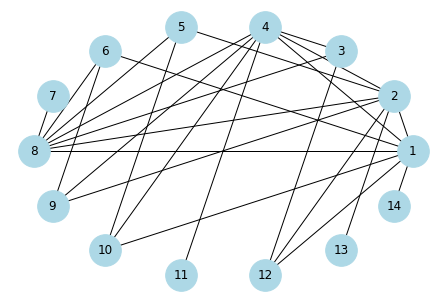

In [69]:
nx.draw_shell(G,node_color='lightblue',node_size =1000,with_labels = True)


In [70]:
def maximise(cand):
       if cand !=set([]):
                l=list(cand)
                max=cand.intersection(set(G.adj[l[0]]))
                imax=l[0]
                for e in l:
                        x=cand.intersection(set(G.adj[e]))
                        if len(x) > len(max):
                            
                            max=x
                            imax=e
       return imax


In [71]:
def expand(subg,cand,Q1,l):
      if subg==set([]) :
             l.append(Q1)
             #print(Q1)
             #print("clique")
      else :
             if cand!=set([]) :
                  u=maximise(cand)
                  while (cand.difference(set(G.adj[u])))!= set([]):
                         m=cand.difference(set(G.adj[u]))
                         for q in m :
                                #print(q,",")
                                Q1=Q1.union(set([q]))
                                subgq=subg.intersection(set(G.adj[q]))
                                candq=cand.intersection(set(G.adj[q]))
                                expand(subgq,candq,Q1,l)
                                cand= cand.difference(set([q]))
                                #print('back')
                                Q1=Q1.difference(set([q]))
      return l
      

In [72]:
#number of clique with Mathematics
from sympy import bell, Symbol, symbols
NC=bell(m)-1
print(" number of clique =",NC)

 number of clique = 14


In [74]:
%%time
#number of clique and the list of cliques with programming
N=set(G.nodes)
Q1=set([])
j=expand(N,N,Q1,[])
print("number of clique =",len(j))
print(j)

number of clique = 14
[{8, 1, 2, 4}, {1, 2, 12}, {1, 10, 4}, {8, 1, 6}, {1, 14}, {8, 3, 4}, {3, 12}, {8, 2, 5}, {10, 5}, {8, 7}, {9, 2, 4}, {9, 6}, {11, 4}, {2, 13}]
Wall time: 1 ms
